
Name: Ghazal Zolfi Moselo                   
Student-ID: 401104146

# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [59]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28)
Test labels shape: (10000, 10)


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [60]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        "W1": np.random.randn(hidden_size, input_size) * 0.1,
        "b1": np.zeros((hidden_size)),
        "W2": np.random.randn(output_size, hidden_size) * 0.1,
        "b2": np.zeros((output_size))
    }
    return parameters




TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [61]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    output = np.maximum(0, x)
    return output

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    output = np.where(x > 0, 1, 0)
    return output

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    output = 1 / (1 + np.exp(-x))
    return output


def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    sig = 1 / (1 + np.exp(-x))
    output = sig * (1 - sig)
    return output


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [62]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    Z1 = np.dot(X,parameters['W1'].T) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1,parameters['W2'].T) + parameters['b2']
    A2 = sigmoid(Z2)

    cache = {
        "X": X,
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [63]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [64]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    W2 = parameters["W2"]

    m = X.shape[0]

    dZ2 = A2 - y_true
    dW2 = np.dot(dZ2.T, A1) / m
    db2 = np.sum(dZ2, axis=0) / m

    dA1 = np.dot(dZ2, W2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1.T, X) / m
    db1 = np.sum(dZ1, axis=0) / m

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [65]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    W1 -= parameters["W1"] * gradients["dW1"]
    b1 -= parameters["b1"] * gradients["db1"]
    W2 -= parameters["W2"] * gradients["dW2"]
    b2 -= parameters["b2"] * gradients["db2"]

    parameters["W1"] = W1
    parameters["b1"] = b1
    parameters["W2"] = W2
    parameters["b2"] = b2

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [66]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return parameters


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [67]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0

    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1

    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[f'd{key}']
        s[key] = beta2 * s[key] + (1 - beta2) * np.square(gradients[f'd{key}'])
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [68]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    v, s, t = initialize_adam(parameters)


    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=learning_rate)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return parameters

### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [69]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters:
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """

    for key in parameters.keys():
      gradient_key = "d" + key
      if gradient_key not in gradients:
          raise KeyError(f"Missing key {gradient_key} in gradients.")

      s[key] = beta * s[key] + (1 - beta) * np.square(gradients[gradient_key])

      parameters[key] -= learning_rate * gradients[gradient_key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [70]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'rmsprop'.")

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=learning_rate)

        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters, loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

In [71]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    loss_histories = {}

    print("\nTraining with Adam optimizer:")
    _, loss_history_adam = train_model(
        X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate, optimizer='adam')
    loss_histories['adam'] = loss_history_adam

    print("\nTraining with RMSprop optimizer:")
    _, loss_history_rmsprop = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate, optimizer='rmsprop')
    loss_histories['rmsprop'] = loss_history_rmsprop

    plt.figure(figsize=(16, 8))
    plt.plot(loss_history_adam, label="Adam")
    plt.plot(loss_history_rmsprop, label="RMSprop")
    plt.title(f"Loss Comparison for Hidden Layer Size {hidden_size}", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


Training with Adam optimizer:
Epoch 0, Loss: 0.8465
Epoch 10, Loss: 1.9136
Epoch 20, Loss: 1.9116
Epoch 30, Loss: 1.2136
Epoch 40, Loss: 1.0913

Training with RMSprop optimizer:
Epoch 0, Loss: 0.8380
Epoch 10, Loss: 1.3455
Epoch 20, Loss: 1.0668
Epoch 30, Loss: 0.8863
Epoch 40, Loss: 0.8520


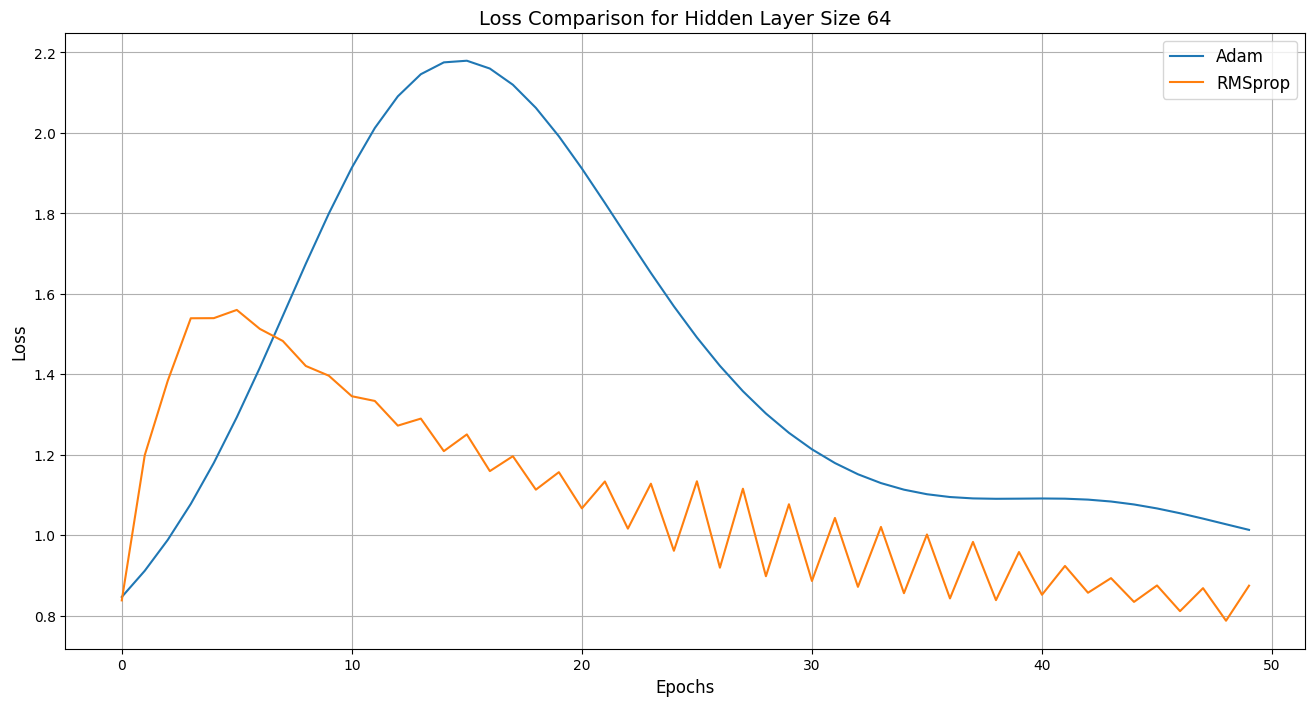

In [72]:
learning_rate = 0.001
compare_optimizers(x_train.reshape(-1, 28*28), y_train, hidden_size=64, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [73]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients[f'd{key}']
    return parameters

2. Modify the Training Loop


In [74]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
      A2, cache = forward_propagation(X_train, parameters)
      loss = compute_loss(y_train, A2)
      gradients = backward_propagation(X_train, y_train, parameters, cache)
      parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

      if epoch % 10 == 0:
          print(f'Epoch {epoch}, Loss: {loss:.4f}')

      loss_history.append(loss)

    return parameters, loss_history

3. Experiment with Different Learning Rates



Training with learning rate = 0.001
Epoch 0, Loss: 0.8111
Epoch 10, Loss: 0.8811
Epoch 20, Loss: 0.9522
Epoch 30, Loss: 1.0250
Epoch 40, Loss: 1.0989

Training with learning rate = 0.01
Epoch 0, Loss: 0.7474
Epoch 10, Loss: 1.4972
Epoch 20, Loss: 1.7927
Epoch 30, Loss: 1.8246
Epoch 40, Loss: 1.7745

Training with learning rate = 0.1
Epoch 0, Loss: 0.8960
Epoch 10, Loss: 1.6433
Epoch 20, Loss: 1.2354
Epoch 30, Loss: 1.0596
Epoch 40, Loss: 0.9676


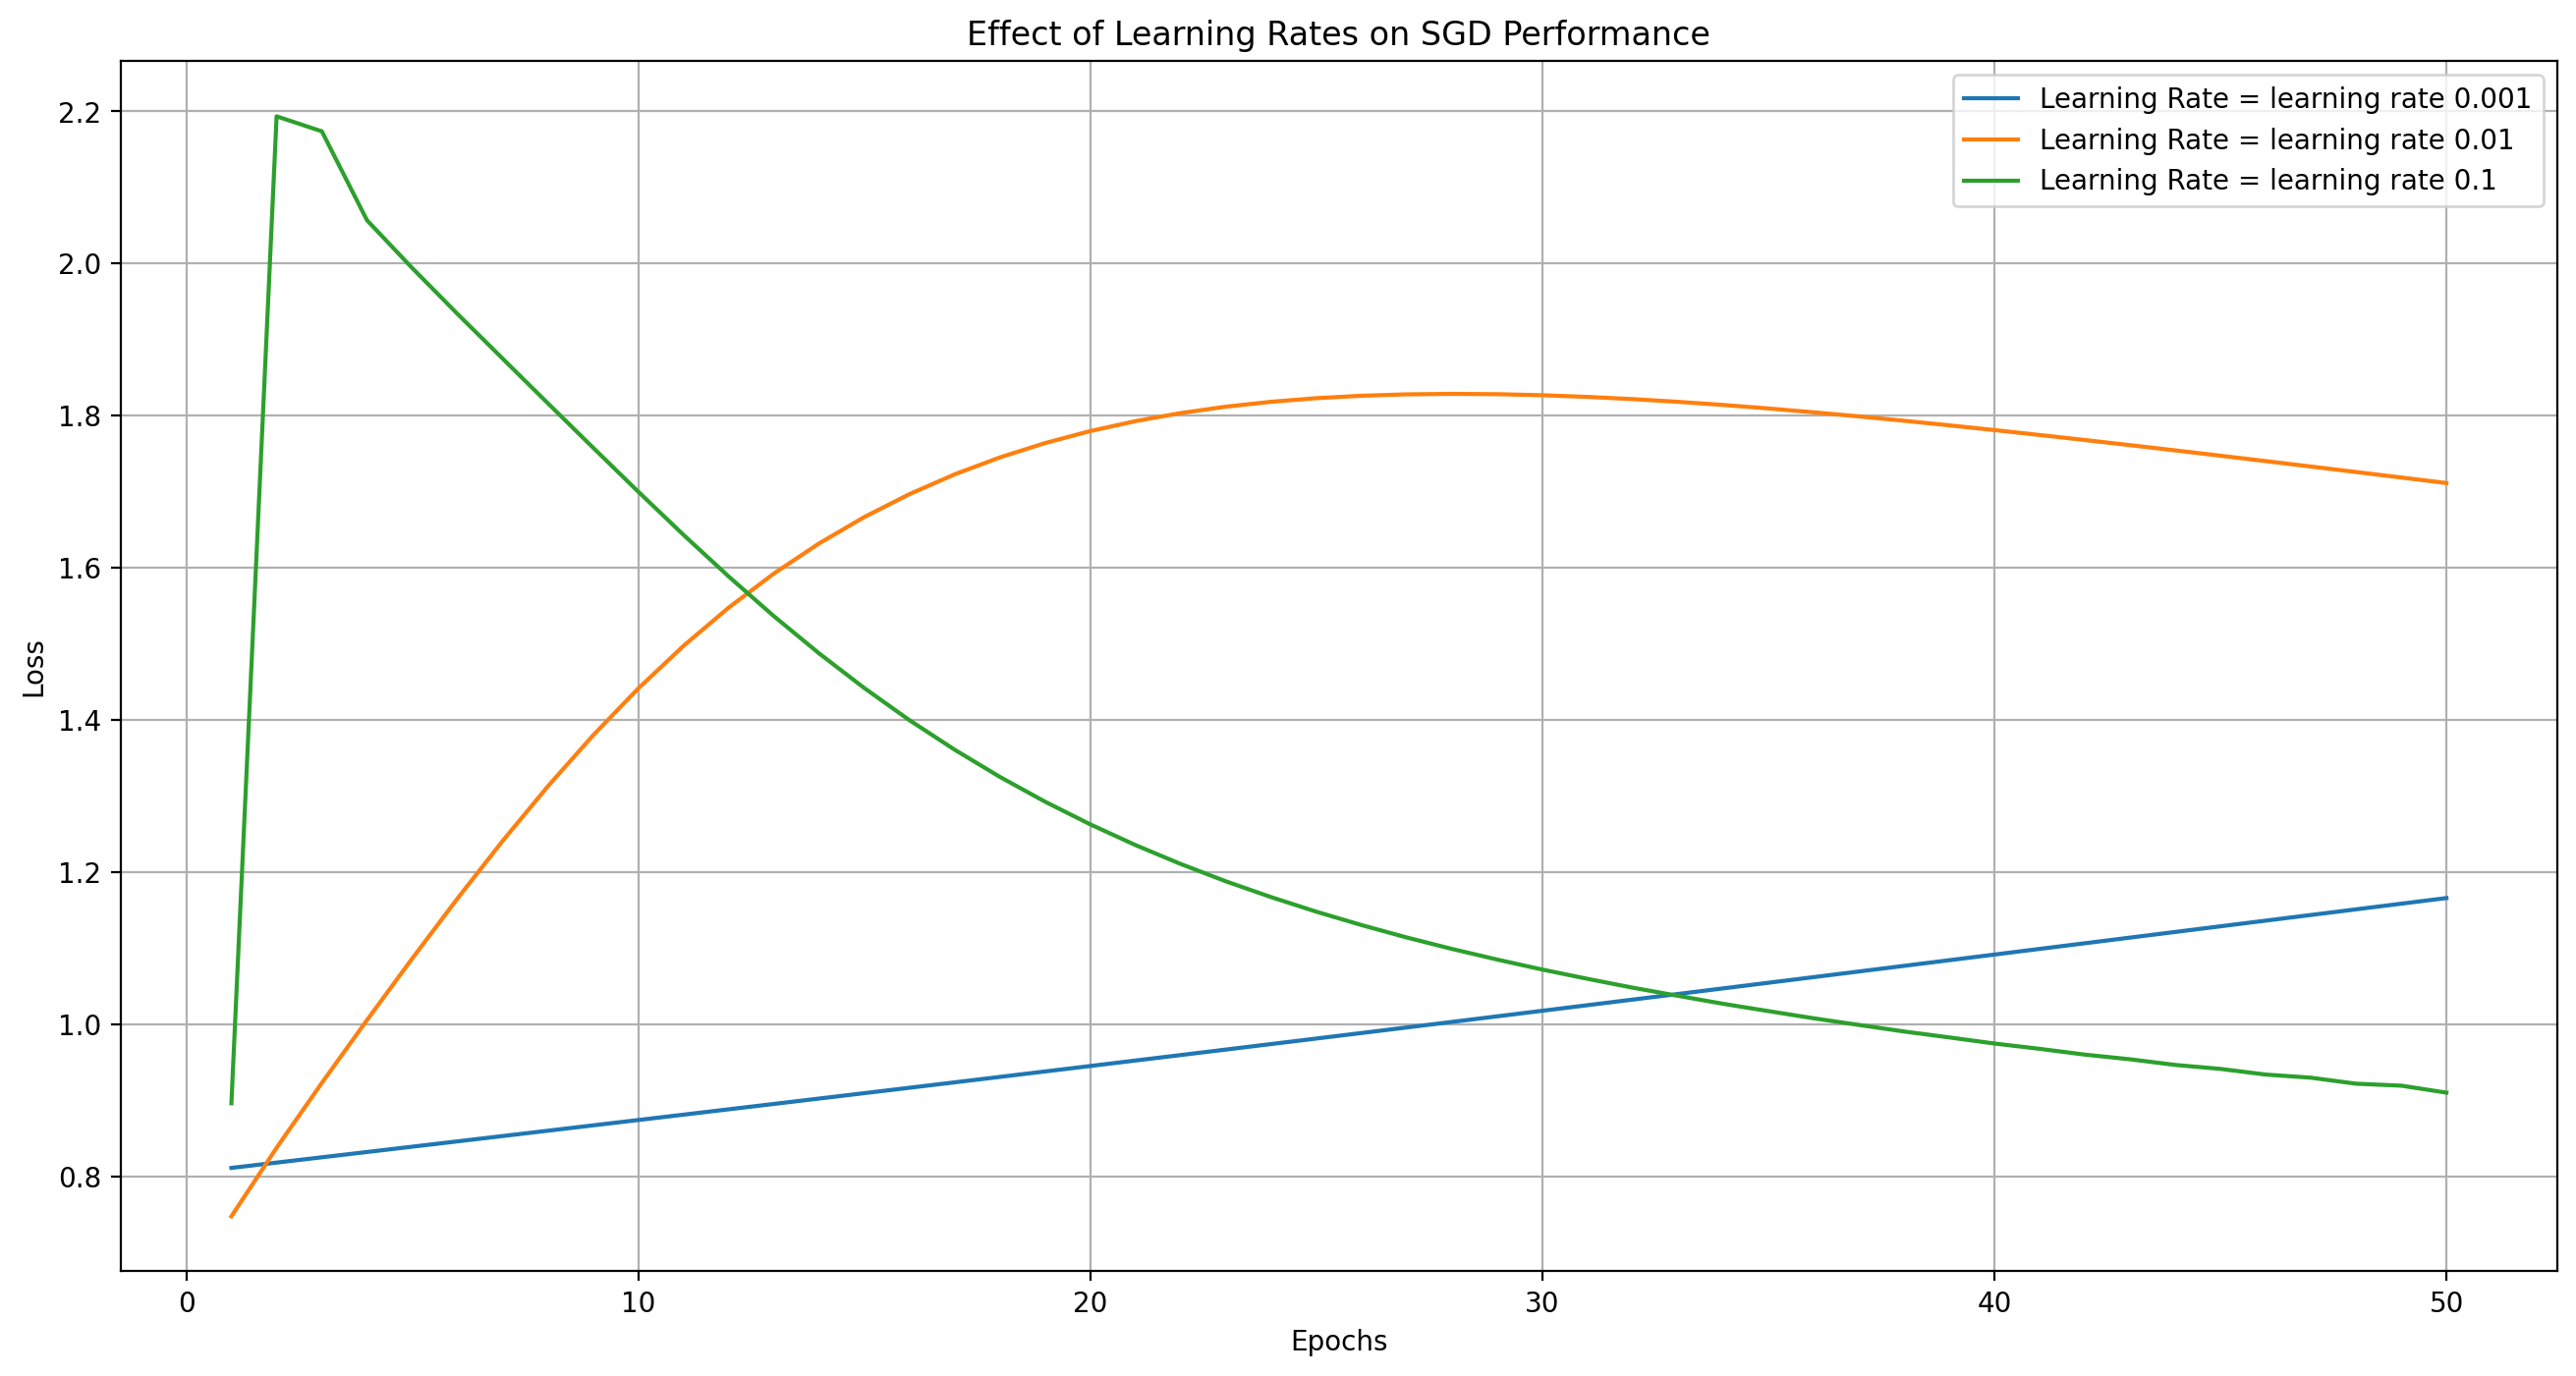

In [75]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.

    Returns:
    - loss_histories: Dictionary of loss histories for each learning rate.
    """
    loss_histories = {}

    for learning_rate in learning_rates:
        print(f"\nTraining with learning rate = {learning_rate}")
        _ , loss_histories[f"learning rate {learning_rate}"] = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate=learning_rate)

    plt.figure(figsize=(16, 8), dpi= 200)
    for learning_rate, loss_history in loss_histories.items():
        plt.plot(range(1, epochs + 1), loss_history, label=f"Learning Rate = {learning_rate}")

    plt.title('Effect of Learning Rates on SGD Performance')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_learning_rates(x_train.reshape(-1, 28*28),y_train, hidden_size=64, epochs=50)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [76]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])  # Initialize momentum for each parameter
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients['d'+key]
        parameters[key] -= learning_rate * v[key]

    return parameters, v

3. Modify the Training Loop


In [77]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Epoch 10/50, Loss: 1.5710
Epoch 20/50, Loss: 1.9226
Epoch 30/50, Loss: 1.9707
Epoch 40/50, Loss: 1.9274
Epoch 50/50, Loss: 1.8606
Epoch 10/50, Loss: 1.2335
Epoch 20/50, Loss: 2.0142
Epoch 30/50, Loss: 2.4644
Epoch 40/50, Loss: 2.3769
Epoch 50/50, Loss: 2.1108


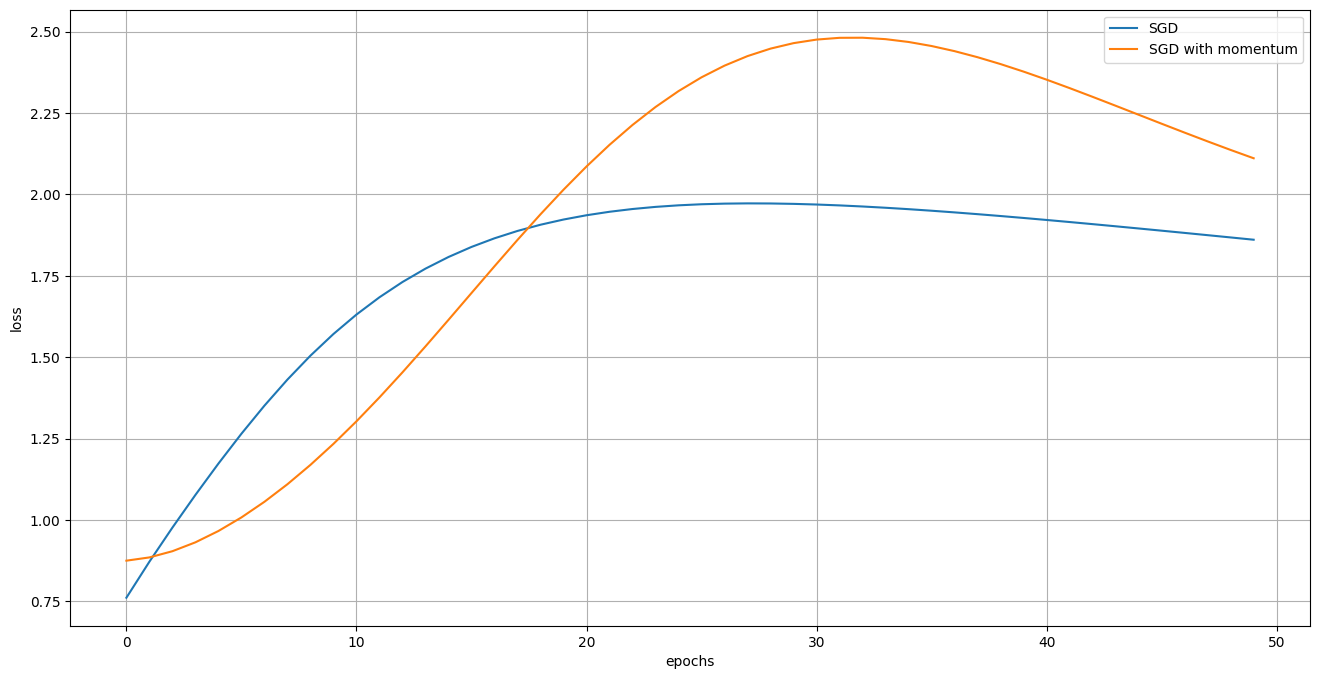

In [78]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    sgd_loss = train_model(X_train, y_train, hidden_size,epochs, optimizer='sgd')

    momentum_loss = train_model(X_train, y_train, hidden_size, epochs, optimizer='momentum')

    plt.figure(figsize=(16, 8))
    plt.plot(sgd_loss, label='SGD')
    plt.plot(momentum_loss, label='SGD with momentum')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid(True)
    plt.legend()
    plt.show()


compare_sgd_and_momentum(x_train.reshape(-1, 28*28),y_train, hidden_size=64, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [79]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []


    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        y_shuffled = y_train[permutation]

        num_batches = X_train.shape[0] // batch_size
        for i in range(num_batches):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            A2, cache = forward_propagation(X_batch, parameters)
            loss = compute_loss(y_batch, A2)
            accuracy = np.mean(np.argmax(A2, axis=1) ==
                               np.argmax(y_batch, axis=1))
            gradients = backward_propagation(
                X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(
                parameters, gradients, learning_rate)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
        loss_history.append(loss)
        accuracy_history.append(accuracy)

    return loss_history, accuracy_history

2. Train the Model with Different Mini-Batch Sizes


In [80]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        print(f'\nTraining with mini-batch size: {batch_size}')
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size, epochs, batch_size=batch_size)
        print(f"Loss for batch size {batch_size}:", np.round(loss_history[-1], 4))
        print(f"Accuracy for batch size {batch_size}:", np.round(accuracy_history[-1], 4))

compare_mini_batch_sizes(x_train.reshape(-1, 28*28), y_train, hidden_size=64, epochs=50)


Training with mini-batch size: 16
Epoch 0, Loss: 0.6097, Accuracy: 0.8750
Epoch 10, Loss: 0.1108, Accuracy: 0.9375
Epoch 20, Loss: 0.1958, Accuracy: 1.0000
Epoch 30, Loss: 0.0647, Accuracy: 1.0000
Epoch 40, Loss: 0.0670, Accuracy: 1.0000
Loss for batch size 16: 0.0495
Accuracy for batch size 16: 1.0

Training with mini-batch size: 32
Epoch 0, Loss: 0.5124, Accuracy: 0.8438
Epoch 10, Loss: 0.2305, Accuracy: 0.9688
Epoch 20, Loss: 0.3088, Accuracy: 0.9688
Epoch 30, Loss: 0.3495, Accuracy: 0.8750
Epoch 40, Loss: 0.0664, Accuracy: 1.0000
Loss for batch size 32: 0.3143
Accuracy for batch size 32: 0.9062

Training with mini-batch size: 64
Epoch 0, Loss: 0.6729, Accuracy: 0.7188
Epoch 10, Loss: 0.2709, Accuracy: 0.9219
Epoch 20, Loss: 0.4105, Accuracy: 0.8594
Epoch 30, Loss: 0.2526, Accuracy: 0.9531
Epoch 40, Loss: 0.1661, Accuracy: 0.9688
Loss for batch size 64: 0.0979
Accuracy for batch size 64: 0.9844


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [81]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, A2)
        loss_history.append(loss)
        predictions = np.argmax(A2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(predictions == labels)
        accuracy_history.append(accuracy)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

In [82]:
from time import time

In [83]:
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    print('Mini-batch gradient descent:')
    minibatch_time_start = time()
    mini_batch_loss, mini_batch_accuracy = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    minibatch_time_end = time()
    print('\nFull-batch gradient descent:')
    fullbatch_time_start = time()
    full_batch_loss, full_batch_accuracy = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    fullbatch_time_end = time()
    print(f"\nMini-Batch Loss: {mini_batch_loss[-1]:.4f}, Accuracy: {mini_batch_accuracy[-1]:.4f}",
          f"Time: {minibatch_time_end - minibatch_time_start:.2f} seconds")
    print(f"Full-Batch Loss: {full_batch_loss[-1]:.4f}, Accuracy: {full_batch_accuracy[-1]:.4f}",
          f"Time: {fullbatch_time_end - fullbatch_time_start:.2f} seconds")

compare_mini_batch_and_full_batch(x_train.reshape(-1, 28*28), y_train, hidden_size=64, epochs=50, batch_size=32)

Mini-batch gradient descent:
Epoch 0, Loss: 0.6117, Accuracy: 0.8125
Epoch 10, Loss: 0.3506, Accuracy: 0.9062
Epoch 20, Loss: 0.1636, Accuracy: 0.9375
Epoch 30, Loss: 0.4536, Accuracy: 0.9062
Epoch 40, Loss: 0.1078, Accuracy: 0.9688

Full-batch gradient descent:
Epoch 10/50, Loss: 1.5991, Accuracy: 0.0751
Epoch 20/50, Loss: 1.9194, Accuracy: 0.1526
Epoch 30/50, Loss: 1.9497, Accuracy: 0.2547
Epoch 40/50, Loss: 1.8984, Accuracy: 0.3412
Epoch 50/50, Loss: 1.8275, Accuracy: 0.4045

Mini-Batch Loss: 0.0233, Accuracy: 1.0000 Time: 109.33 seconds
Full-Batch Loss: 1.8275, Accuracy: 0.4045 Time: 45.18 seconds
